<a href="https://colab.research.google.com/github/biancaitalia/BME3053C-Spring-2025/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [95]:
def generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=False):
  angles = np.linspace(np.pi/2, 5*np.pi/2, num_points*2, endpoint=False)
  radii = np.array([outer_radius, inner_radius] * num_points)
  x = radii * np.cos(angles) + center[0]
  y = radii * np.sin(angles) + center[1]
  return np.column_stack((x,y)) if not homogeneous else np.column_stack((x,y, np.ones(num_points*2)))

def plot_star(ax, star, title, global_view):
  ax.plot(star[:, 0], star[:, 1], 'b-')
  ax.plot([star[-1,0], star[0, 0]], [star[-1,1], star[0,1]], 'b-')
  ax.set_title(title)
  ax.axis('equal')
  if global_view:
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.axhline(0, color = 'black')
    ax.axvline(0, color = 'black')
  ax.grid(True)

  star_center = np.mean(star, axis = 0)
  arrow_start = star_center

  vector_to_point = star[0] - star_center
  direction = vector_to_point/np.linalg.norm(vector_to_point)
  arrow_length = np.linalg.norm(vector_to_point)/2
  arrow_end = star_center + (arrow_length) * direction
  headwidth=6 if global_view else 8
  width = 1 if global_view else 2

  ax.annotate('', xy=arrow_end, xytext=arrow_start, arrowprops=dict(facecolor='green', shrink=0.05, width=width, headwidth=headwidth))

def plot_stars(stars, global_view=False):
  if len(stars) == 1 or not isinstance(stars, list):
    print("There must be a list of multiple stars to plot")
    return
  num_stars = len(stars)
  fig, axs = plt.subplots(1, num_stars, figsize = (10,5))
  for i, star in enumerate(stars):
    plot_star(axs[i], star[:, :2], f'Star {i+1}', global_view)

def rotate(angle_degrees):
  angle_radians = np.radians(angle_degrees)
  cos_theta = np.cos(angle_radians)
  sin_theta = np.sin(angle_radians)
  return np.array([[cos_theta, -sin_theta,0], [sin_theta, cos_theta,0], [0,0,1],])

def scale(sx,sy):
  return np.array([[sx,0,0], [0,sy,0], [0,0,1],])

def translate(tx, ty):
  return np.array([[1,0,tx], [0,1,ty], [0,0,1],])



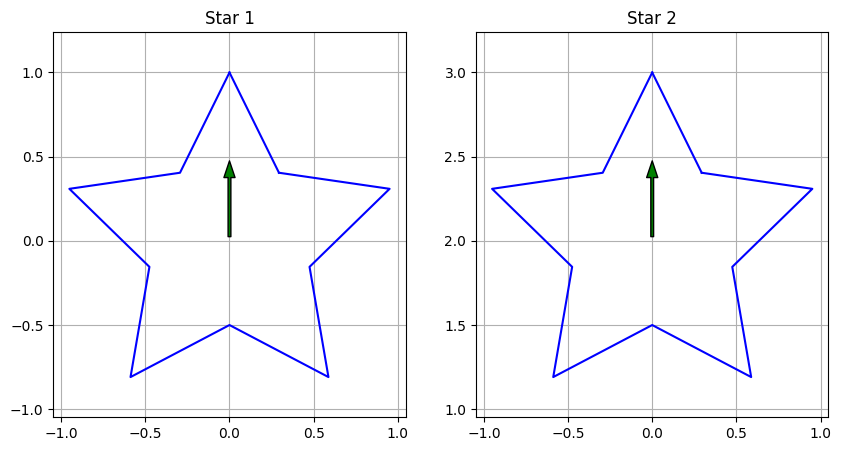

In [79]:
star = generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=True)

translate_matrix = translate(0,2)
translated_star = np.dot(star, translate_matrix.T)
plot_stars([star, translated_star])

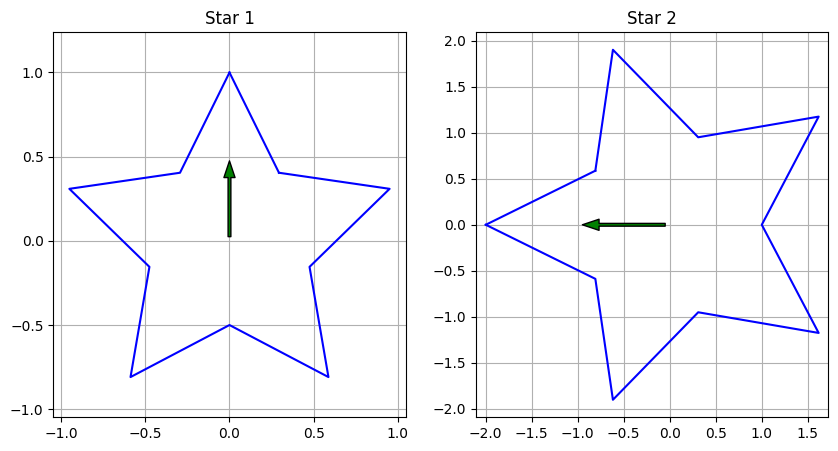

In [103]:
star = generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=True)

combined_transformation = np.dot(rotate(90), scale(2,2))
transformed_star = np.dot(star, combined_transformation.T)

plot_stars([star, transformed_star])

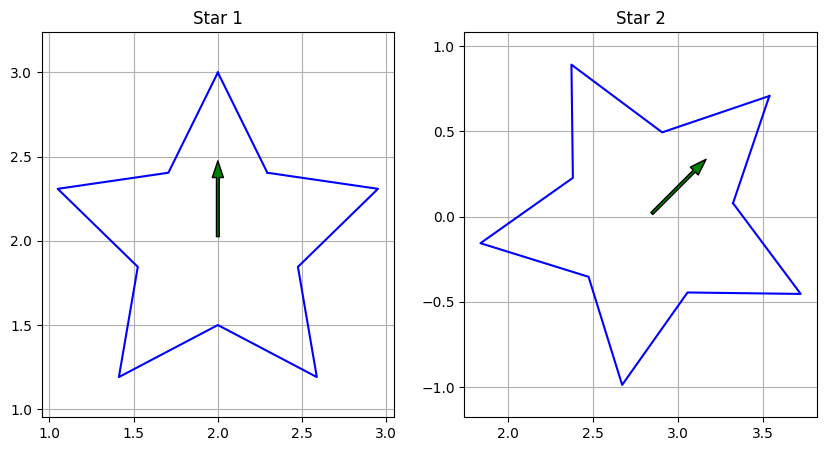

In [190]:
star = generate_star(center=(2,2), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=True)

rotation = rotate(-45)
rotated_star = np.dot(star, rotation.T)

plot_stars([star, rotated_star])

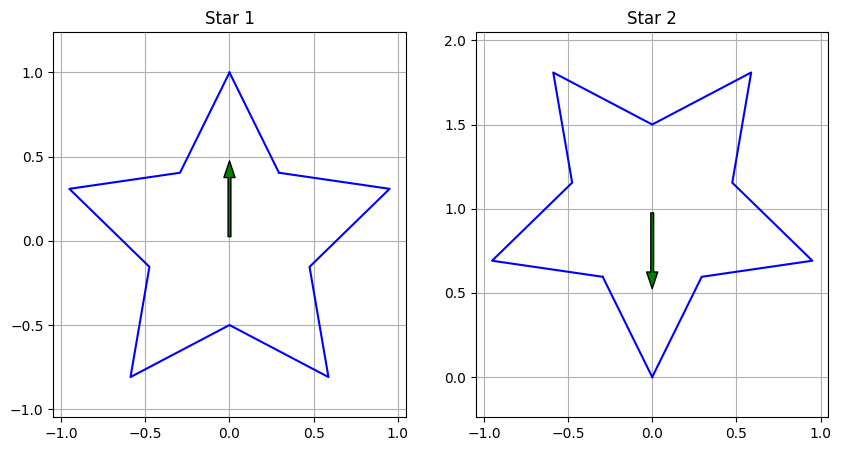

In [98]:
star = generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=True)

combined_transformation = np.dot(translate(0, 1), rotate(180).T)
transformed_star = np.dot(star, combined_transformation.T)

plot_stars([star, transformed_star])


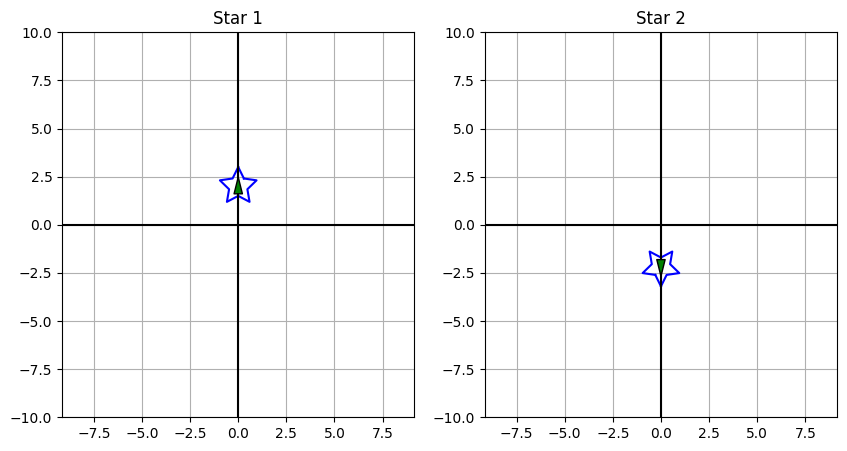

In [129]:
star = generate_star(center=(0, 2), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=True)

combined_transformation = np.dot(rotate(180), translate(0,0.2))
transformed_star = np.dot(star, combined_transformation.T)

plot_stars([star, transformed_star], global_view=True)

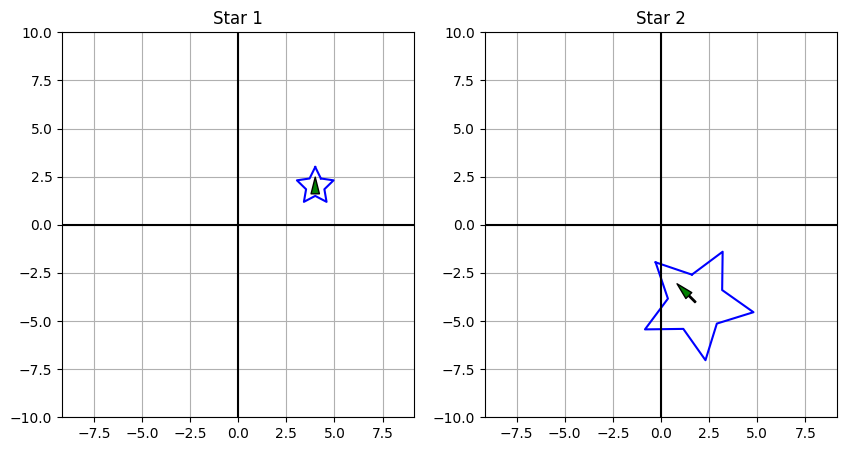

In [183]:
star = generate_star(center=(4, 2), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=True)

combined_transformation = scale(3,3) @ translate(-0.8,-5.6) @ rotate(45)

transformed_star = (star @ combined_transformation.T)

plot_stars([star, transformed_star], global_view=True)
